# Stellar Mass Table distribution fit
*Parse table from csv file*

In [20]:
from pandas import read_csv


df = read_csv('stellar_mass.csv')
df = df.set_index(df.mass)
df.head()

,mass,p
mass,,
2.0,2.0,0.002315
1.9,1.9,0.002315
1.8,1.8,0.003601
1.7,1.7,0.005080
1.6,1.6,0.005209


## Discrete probabilities
*the p column contains probability of the consecutives dice rolls corresponding to the star masses*

In [21]:
x = df.index
y = df.p
df.p.sum()

0.9999999999999999

*creating random sample of 1000 elements from given probabilities*

In [24]:
from random import choices

sample = choices(list(df.index), weights=list(df.p), k=1000)

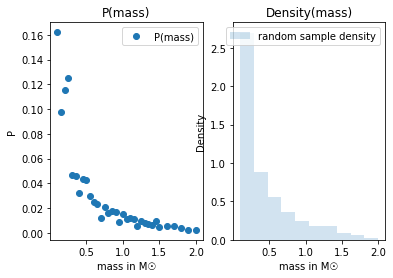

In [25]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(mass)")
axs[0].plot(x, y, 'o', label='P(mass)')
axs[0].set_xlabel('mass in M☉')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(mass)")
axs[1].hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
axs[1].set_xlabel('mass in M☉')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated exponential distribution to the random sample*

In [28]:
from scipy.stats import truncexpon

upper, lower = 2, .1
b, mu, sigma = truncexpon.fit(data, fb=upper-lower, floc=lower)
b, mu, sigma

(1.9, 0.1, 1.000000099182133)

In [33]:
from scipy.stats import kstest

dist = truncexpon(b=b / sigma, scale=sigma, loc=mu)
res = kstest(data, [b, mu, sigma], 'truncexpon')
res

KstestResult(statistic=0.5546666666666666, pvalue=0.22020177779247874)

*density function from the fitted continuous random variable*

In [38]:
y_pdf =  [dist.pdf(xi) for xi in x]

*creating random sample of 1000 elements from the fitted continuous random variable*

In [34]:
fit_sample = dist.rvs(size=1000)

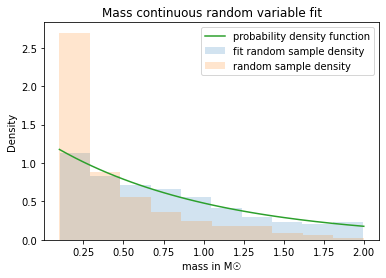

In [40]:
_, ax = plt.subplots()
ax.set_title(r"Mass continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='stepfilled', alpha=0.2, label='fit random sample density')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
ax.plot(x, y_pdf, '-', label='probability density function')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Density')
ax.legend()
plt.show()